In [1]:
import pandas as pd 
df=pd.read_csv("dataset_full.csv")


In [2]:
import warnings  
warnings.filterwarnings("ignore")  
  
import pandas as pd  
pd.set_option("display.max_columns",None) 
#pd.set_option("display.max_rows",None) 

 
 

import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline  
from sklearn.model_selection import train_test_split  
from sklearn.preprocessing import MinMaxScaler 

In [3]:
df.head()

,qty_dot_url,qty_hyphen_url,qty_underline_url,qty_slash_url,qty_questionmark_url,qty_equal_url,qty_at_url,qty_and_url,qty_exclamation_url,qty_space_url,qty_tilde_url,qty_comma_url,qty_plus_url,qty_asterisk_url,qty_hashtag_url,qty_dollar_url,qty_percent_url,qty_tld_url,length_url,qty_dot_domain,qty_hyphen_domain,qty_underline_domain,qty_slash_domain,qty_questionmark_domain,qty_equal_domain,qty_at_domain,qty_and_domain,qty_exclamation_domain,qty_space_domain,qty_tilde_domain,qty_comma_domain,qty_plus_domain,qty_asterisk_domain,qty_hashtag_domain,qty_dollar_domain,qty_percent_domain,qty_vowels_domain,domain_length,domain_in_ip,server_client_domain,qty_dot_directory,qty_hyphen_directory,qty_underline_directory,qty_slash_directory,qty_questionmark_directory,qty_equal_directory,qty_at_directory,qty_and_directory,qty_exclamation_directory,qty_space_directory,qty_tilde_directory,qty_comma_directory,qty_plus_directory,qty_asterisk_directory,qty_hashtag_directory,qty_dollar_directory,qty_percent_directory,directory_length,qty_dot_file,qty_hyphen_file,qty_underline_file,qty_slash_file,qty_questionmark_file,qty_equal_file,qty_at_file,qty_and_file,qty_exclamation_file,qty_space_file,qty_tilde_file,qty_comma_file,qty_plus_file,qty_asterisk_file,qty_hashtag_file,qty_dollar_file,qty_percent_file,file_length,qty_dot_params,qty_hyphen_params,qty_underline_params,qty_slash_params,qty_questionmark_params,qty_equal_params,qty_at_params,qty_and_params,qty_exclamation_params,qty_space_params,qty_tilde_params,qty_comma_params,qty_plus_params,qty_asterisk_params,qty_hashtag_params,qty_dollar_params,qty_percent_params,params_length,tld_present_params,qty_params,email_in_url,time_response,domain_spf,asn_ip,time_domain_activation,time_domain_expiration,qty_ip_resolved,qty_nameservers,qty_mx_servers,ttl_hostname,tls_ssl_certificate,qty_redirects,url_google_index,domain_google_index,url_shortened,phishing
0,3,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,25,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,17,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,8,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,0,0.207316,0,60781,-1,-1,1,2,0,892,0,0,0,0,0,1
1,5,0,1,3,0,3,0,2,0,0,0,0,0,0,0,0,0,3,223,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,16,0,0,3,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,42,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,9,0,0,1,0,0,3,0,2,0,0,0,0,0,0,0,0,0,165,0,3,0,0.499566,-1,36024,579,150,1,2,1,9540,1,0,0,0,0,1
2,2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,15,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,14,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,0,0.935901,0,4766,-1,-1,1,2,3,589,1,0,0,0,0,0
3,4,0,2,5,0,0,0,0,0,0,0,0,0,0,0,0,0,1,81,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7,19,0,0,2,0,2,5,0,0,0,0,0,0,0,0,0,0,0,0,0,62,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,9,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,0,0.410021,0,20454,-1,-1,1,2,0,292,1,0,0,0,0,1
4,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,19,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,19,0,0,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,0,0.410761,0,53831,6998,306,1,2,1,3597,0,1,0,0,0,0


In [4]:
df.columns

Index(['qty_dot_url', 'qty_hyphen_url', 'qty_underline_url', 'qty_slash_url',
       'qty_questionmark_url', 'qty_equal_url', 'qty_at_url', 'qty_and_url',
       'qty_exclamation_url', 'qty_space_url',
       ...
       'qty_ip_resolved', 'qty_nameservers', 'qty_mx_servers', 'ttl_hostname',
       'tls_ssl_certificate', 'qty_redirects', 'url_google_index',
       'domain_google_index', 'url_shortened', 'phishing'],
      dtype='object', length=112)

In [5]:
# Check the number of unique values of each column


## Dataset Information

- **Dataset Name**: Phishing Detection Dataset
- **Number of Instances**: [Number of rows in your dataset]
- **Number of Features**: 112
- **Dataset Description**: This dataset contains features related to URLs and domains, along with a target variable indicating whether each URL is phishing or not.

### Features

1. **qty_dot_url**: Quantity of dots in the URL.
2. **qty_hyphen_url**: Quantity of hyphens in the URL.
3. **qty_underline_url**: Quantity of underscores in the URL.
   ...
   [Add descriptions for all 112 features]

### Target Variable

- **phishing**: Label indicating whether the URL is phishing (1) or not (0).

### Data Types

- **Data Types of Features**: [Provide the data types of each feature, e.g., numerical, categorical]


In [6]:
types=df.dtypes
types

qty_dot_url             int64
qty_hyphen_url          int64
qty_underline_url       int64
qty_slash_url           int64
qty_questionmark_url    int64
                        ...  
qty_redirects           int64
url_google_index        int64
domain_google_index     int64
url_shortened           int64
phishing                int64
Length: 112, dtype: object

In [7]:
#missingh values 
df.isna().sum()

qty_dot_url             0
qty_hyphen_url          0
qty_underline_url       0
qty_slash_url           0
qty_questionmark_url    0
                       ..
qty_redirects           0
url_google_index        0
domain_google_index     0
url_shortened           0
phishing                0
Length: 112, dtype: int64

In [8]:
#duplicates 
df.duplicated().sum()

1438

In [9]:
df.drop_duplicates(inplace=True)


In [10]:
df.shape

(87209, 112)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 87209 entries, 0 to 88646
Columns: 112 entries, qty_dot_url to phishing
dtypes: float64(1), int64(111)
memory usage: 75.2 MB


In [12]:
print(type(df))


<class 'pandas.core.frame.DataFrame'>


In [13]:
df["phishing"].value_counts()

phishing
0    56712
1    30497
Name: count, dtype: int64

In [14]:
import pandas as pd
from sklearn.utils import resample

# Assuming 'df' is your DataFrame with the unbalanced dataset
# Replace 'df' with the actual name of your DataFrame

# Separate the dataset into two based on the class labels
df_majority = df[df['phishing'] == 0]
df_minority = df[df['phishing'] == 1]

# Upsample the minority class to match the number of instances in the majority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=len(df_majority),    # to match majority class
                                 random_state=42) # reproducible results

# Concatenate the upsampled minority class and the original majority class
df_balanced = pd.concat([df_majority, df_minority_upsampled])

# Now df_balanced contains a balanced dataset with an equal number of instances for each class


In [15]:
df_balanced.to_csv('file_path.csv', index=False, header=True)


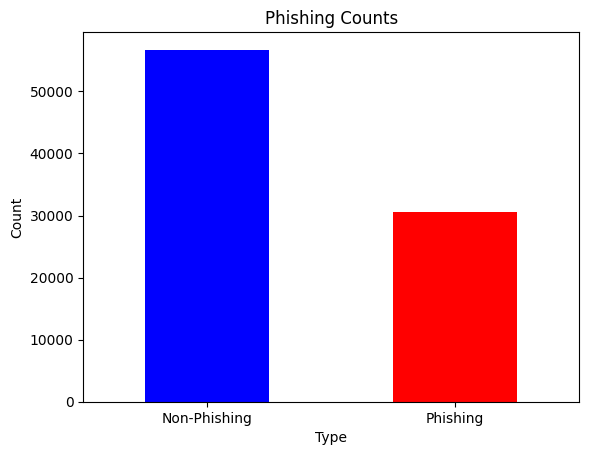

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

# Create a pandas Series object
data = pd.Series([56712, 30497], index=['Non-Phishing', 'Phishing'])

# Plot the counts
data.plot(kind='bar', color=['blue', 'red'])
plt.title('Phishing Counts')
plt.xlabel('Type')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()


## Counts of Phishing URLs

| Phishing | Count |
|----------|-------|
| 1        |       |
| 0        |       |


In [17]:
object_features=[col for col in df.columns if df[col].dtype=="O"]  
print(object_features)  

[]


In [18]:
X=df.iloc[:,:-1]  
y=df.iloc[:,-1:]  

In [21]:
X.shape
y.shape

(87209, 1)

In [22]:
X.shape

(87209, 111)

NameError: name 'significant_features' is not defined

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
col_list = []
for col in data.columns:
    if (col != 'phishing'):
        col_list.append(col)
        
X = data[col_list]
vif_data = pd.DataFrame()
vif_data['feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values,i)
                  for i in range(len(X.columns))]

print(vif_data)

ModuleNotFoundError: No module named 'statsmodels'

In [ ]:
X

,qty_dot_url,qty_hyphen_url,qty_underline_url,qty_slash_url,qty_questionmark_url,qty_equal_url,qty_at_url,qty_and_url,qty_exclamation_url,qty_space_url,qty_tilde_url,qty_comma_url,qty_plus_url,qty_asterisk_url,qty_hashtag_url,qty_dollar_url,qty_percent_url,qty_tld_url,length_url,qty_dot_domain,qty_hyphen_domain,qty_vowels_domain,domain_in_ip,qty_dot_directory,qty_hyphen_directory,qty_underline_directory,qty_slash_directory,qty_questionmark_directory,qty_equal_directory,qty_at_directory,qty_and_directory,qty_exclamation_directory,qty_space_directory,qty_tilde_directory,qty_comma_directory,qty_plus_directory,qty_asterisk_directory,qty_hashtag_directory,qty_dollar_directory,qty_percent_directory,directory_length,qty_dot_file,qty_hyphen_file,qty_underline_file,qty_slash_file,qty_questionmark_file,qty_equal_file,qty_at_file,qty_and_file,qty_exclamation_file,qty_space_file,qty_tilde_file,qty_comma_file,qty_plus_file,qty_asterisk_file,qty_hashtag_file,qty_dollar_file,qty_percent_file,file_length,qty_dot_params,qty_hyphen_params,qty_underline_params,qty_slash_params,qty_questionmark_params,qty_equal_params,qty_at_params,qty_and_params,qty_exclamation_params,qty_space_params,qty_tilde_params,qty_comma_params,qty_plus_params,qty_asterisk_params,qty_hashtag_params,qty_dollar_params,qty_percent_params,params_length,tld_present_params,qty_params,email_in_url,time_response,asn_ip,time_domain_activation,time_domain_expiration,qty_ip_resolved,qty_nameservers,qty_mx_servers,ttl_hostname,tls_ssl_certificate,qty_redirects,url_google_index,url_shortened
0,3,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,25,2,0,4,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,8,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,0,0.207316,60781,-1,-1,1,2,0,892,0,0,0,0
1,5,0,1,3,0,3,0,2,0,0,0,0,0,0,0,0,0,3,223,2,0,5,0,3,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,42,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,9,0,0,1,0,0,3,0,2,0,0,0,0,0,0,0,0,0,165,0,3,0,0.499566,36024,579,150,1,2,1,9540,1,0,0,0
2,2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,15,2,0,3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,0,0.935901,4766,-1,-1,1,2,3,589,1,0,0,0
3,4,0,2,5,0,0,0,0,0,0,0,0,0,0,0,0,0,1,81,2,0,7,0,2,0,2,5,0,0,0,0,0,0,0,0,0,0,0,0,0,62,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,9,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,0,0.410021,20454,-1,-1,1,2,0,292,1,0,0,0
4,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,19,2,0,5,0,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,0,0.410761,53831,6998,306,1,2,1,3597,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88642,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,23,3,1,5,0,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,0,0.135186,8560,5509,334,1,3,1,3597,0,0,0,0
88643,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,34,2,0,14,0,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,0,0.397981,26496,5046,431,1,2,2,591,0,2,0,0
88644,2,1,0,5,0,0,0,0,0,0,0,0,0,0,0,0,0,1,70,1,0,6,0,1,1,0,5,0,0,0,0,0,0,0,0,0,0,0,0,0,48,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,11,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,0,0.745030,394695,1844,712,1,2,5,14391,1,0,0,0
88645,2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,28,2,0,5,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1

In [ ]:
df['phishing'].unique()


array([1, 0], dtype=int64)

In [ ]:
#scaler=MinMaxScaler()  
#scaler.fit(X.values)  
#X_scaled=scaler.transform(X.values)  
#print(X_scaled)  


In [ ]:
import pickle  

# Assuming 'scaler' is your scaler object
with open(file="scaler.pkl", mode="wb") as file:  
    pickle.dump(obj=scaler, file=file)  # Corrected parameter name 'file'


NameError: name 'scaler' is not defined

In [ ]:
#new_X=pd.DataFrame(data=X_scaled,columns=X.columns)  
#new_X.head()  


In [ ]:
new_X.

SyntaxError: invalid syntax (569896301.py, line 1)

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42,shuffle=True,stratify=y)  
print(X_train.shape,y_train.shape,X_test.shape,y_test.shape) 

(69767, 111) (69767, 1) (17442, 111) (17442, 1)


qty_dot_url             0
qty_hyphen_url          0
qty_underline_url       0
qty_slash_url           0
qty_questionmark_url    0
                       ..
ttl_hostname            0
tls_ssl_certificate     0
qty_redirects           0
url_google_index        0
url_shortened           0
Length: 92, dtype: int64

In [ ]:
from phishingdetection.utils.common import expected_features, extract_features
from sklearn.ensemble import RandomForestClassifier
import pickle
from sklearn.metrics import accuracy_score, precision_score
import pandas as pd
from sklearn.preprocessing import MinMaxScaler


# Load the model from the file
model_file_path = 'best_models.pkl'
with open(model_file_path, 'rb') as f:
    model = pickle.load(f)
    scaler=MinMaxScaler()
    # Load test data
    


    # Predict using the loaded machine learning model
    y_pred = model.predict(X_test)

    # Evaluate model
    precision = precision_score(y_test, y_pred, average='micro')
    accuracy = accuracy_score(y_test, y_pred)

print("Precision:", precision)
print("Accuracy:", accuracy)


ValueError: The feature names should match those that were passed during fit.
Feature names seen at fit time, yet now missing:
- domain_google_index
- domain_length
- domain_spf
- qty_and_domain
- qty_asterisk_domain
- ...


In [ ]:
X_test.

SyntaxError: unexpected EOF while parsing (3810316097.py, line 1)

In [ ]:
def model_selection(X_train, y_train, X_test, y_test, models):
    
    from sklearn.metrics import accuracy_score, precision_score
    
    accuracy_result = []
    precission_result = []
    str_models = []
    
    for model in models:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        precission = precision_score(y_test, y_pred,average='micro')
        accuracy = accuracy_score(y_test, y_pred)       
        accuracy_result.append(accuracy)
        precission_result.append(precission)  
        str_models.append(str(model))
    
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10,10))

    ax1.plot(accuracy_result)
    ax1.set_ylabel('accuracy_score')

    ax2.plot(str_models,precission_result)
    ax2.set_ylabel('precission_result')
    ax2.set_xticklabels(str_models, rotation=90)
    plt.tight_layout()
    
    return pd.DataFrame({'models':models, 'accuracy':accuracy_result, 'precission':precission_result}) 


In [ ]:

from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.neighbors import KNeighborsClassifier, RadiusNeighborsClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import GradientBoostingClassifier



In [ ]:

from sklearn.metrics import accuracy_score, precision_score
model=GradientBoostingClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
precission = precision_score(y_test, y_pred,average='micro')
accuracy = accuracy_score(y_test, y_pred)  
precission 
accuracy

0.9524137140236212

In [ ]:
models = [LogisticRegression(), RidgeClassifier(alpha=0.005), LinearSVC(), SVC(), KNeighborsClassifier(n_neighbors=5),
          RadiusNeighborsClassifier(radius=1.0, outlier_label=-1), DecisionTreeClassifier(), RandomForestClassifier(),
          AdaBoostClassifier(), MLPClassifier(),GradientBoostingClassifier()]

,models,accuracy,precission
0,LogisticRegression(),0.909815,0.909815
1,RidgeClassifier(alpha=0.005),0.915549,0.915549
2,LinearSVC(),0.663571,0.663571
3,SVC(),0.758113,0.758113
4,KNeighborsClassifier(),0.872549,0.872549
5,RadiusNeighborsClassifier(outlier_label=-1),0.041165,0.041165
6,DecisionTreeClassifier(),0.951382,0.951382
7,"(DecisionTreeClassifier(max_features='sqrt', r...",0.970072,0.970072
8,"(DecisionTreeClassifier(max_depth=1, random_st...",0.933781,0.933781
9,MLPClassifier(),0.887341,0.887341


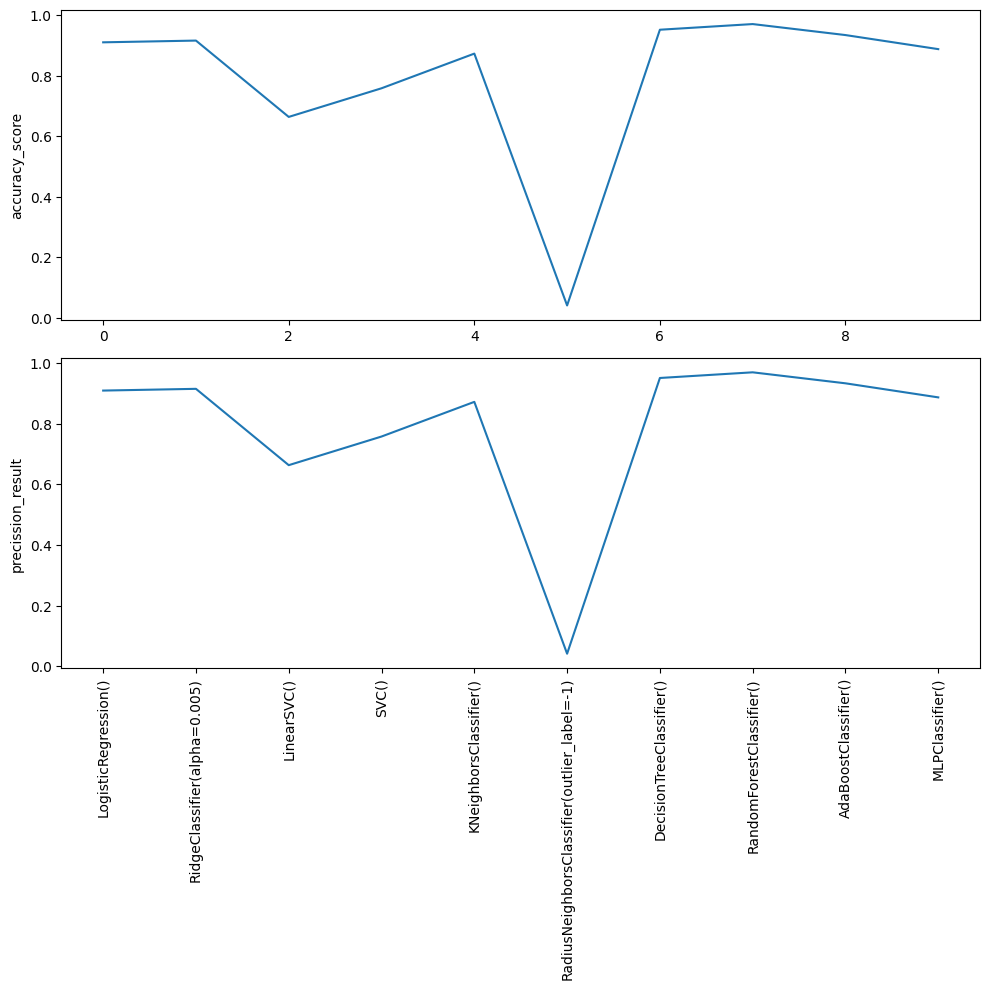

In [ ]:
model_selection(X_train, y_train, X_test, y_test, models)

In [ ]:
# Assuming df_balanced is your DataFrame containing the 96 columns
column_list =X_train.columns.tolist()
column_list

['qty_dot_url',
 'qty_hyphen_url',
 'qty_underline_url',
 'qty_slash_url',
 'qty_questionmark_url',
 'qty_equal_url',
 'qty_at_url',
 'qty_and_url',
 'qty_exclamation_url',
 'qty_space_url',
 'qty_tilde_url',
 'qty_comma_url',
 'qty_plus_url',
 'qty_asterisk_url',
 'qty_hashtag_url',
 'qty_dollar_url',
 'qty_percent_url',
 'qty_tld_url',
 'length_url',
 'qty_dot_domain',
 'qty_hyphen_domain',
 'qty_underline_domain',
 'qty_slash_domain',
 'qty_questionmark_domain',
 'qty_equal_domain',
 'qty_at_domain',
 'qty_and_domain',
 'qty_exclamation_domain',
 'qty_space_domain',
 'qty_tilde_domain',
 'qty_comma_domain',
 'qty_plus_domain',
 'qty_asterisk_domain',
 'qty_hashtag_domain',
 'qty_dollar_domain',
 'qty_percent_domain',
 'qty_vowels_domain',
 'domain_length',
 'domain_in_ip',
 'server_client_domain',
 'qty_dot_directory',
 'qty_hyphen_directory',
 'qty_underline_directory',
 'qty_slash_directory',
 'qty_questionmark_directory',
 'qty_equal_directory',
 'qty_at_directory',
 'qty_and_dir

In [ ]:
from phishingdetection.utils.common import expected_features, extract_features
from sklearn.ensemble import RandomForestClassifier

with open("random_forest_model.pkl", "rb") as file:
    model = pickle.load(file)


# # Extract features from the URL (assuming this function exists)
features = extract_features("httpsai.com/")

# Match expected features
features = {feature: features.get(feature, 0) for feature in column_list}

# Arrange features based on the expected feature order
arranged_features = [features[feature] for feature in column_list]

# Retrieve feature values only for the columns present in column_list
feature_values = arranged_features
feature_values=np.array(feature_values)

feature_values= feature_values.reshape(1, -1)


#model=RandomForestClassifier()
#model=model.fit(X_train,y_train)
y=model.predict(feature_values)

print(y)

ValueError: X has 111 features, but RandomForestClassifier is expecting 19 features as input.

In [ ]:
y

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [ ]:
import logging
import pickle
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score

def evaluate_models(models, X_train, X_test, y_train, y_test):
    accuracy_result = []
    precision_result = []
    models_dict = {}

    for model in models:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        precision = precision_score(y_test, y_pred, average='micro')
        accuracy = accuracy_score(y_test, y_pred)
        accuracy_result.append(accuracy)
        precision_result.append(precision)
        models_dict[str(model)] = {'model': model, 'accuracy': accuracy, 'precision': precision}

    logging.info("Saving models to file")
    with open("modelss.pkl", 'wb') as f:
        pickle.dump(models_dict, f)
    logging.info("Models saved successfully.")

# Example usage:
# evaluate_models([model1, model2], X_train, X_test, y_train, y_test)


In [ ]:
evaluate_models(models, X_train, X_test, y_train, y_test)

In [ ]:
import pickle

def view_pickle_contents(file_path):
    with open(file_path, 'rb') as f:
        data = pickle.load(f)
    print("Contents of the pickle file:")
    print(data)

# Provide the file path of the pickle file you want to view
pickle_file_path = "random_forest_model.pkl"
view_pickle_contents(pickle_file_path)


Contents of the pickle file:
RandomForestClassifier(random_state=42)


In [ ]:
def save_models(self, models_dict):
        logging.info("Saving models to file")
        with open("modell.pkl", 'wb') as f:
            pickle.dump(models_dict, f)
        logging.info("Models saved successfully.")

In [ ]:
import pickle

# Load the .pkl file
with open('max_accuracy_model.pkl', 'rb') as f:
    data = pickle.load(f)

# Check what keys are present in the loaded data
print("Keys in the pickle file:", data.keys())

# Assuming the models are stored under a key named 'models'
if 'models' in data:
    # Print or iterate through the list of models
    print("List of models:")
    for model in data['models']:
        print(model)
else:
    print("No 'models' key found in the pickle file.")


AttributeError: 'RandomForestClassifier' object has no attribute 'keys'

In [ ]:
import pickle

def load_models(file_path):
    with open(file_path, 'rb') as f:
        models_dict = pickle.load(f)
    return models_dict

def find_max_accuracy_model(models_dict):
    max_accuracy = 0
    max_accuracy_model = None
    for key, value in models_dict.items():
        accuracy = value['accuracy']
        if accuracy > max_accuracy:
            max_accuracy = accuracy
            max_accuracy_model = value['model']
    return max_accuracy_model

def save_model_to_pickle(model, file_path):
    with open(file_path, 'wb') as f:
        pickle.dump(model, f)

# Load models from the pickle file
models_dict = load_models("modelss.pkl")

# Find the model with maximum accuracy
max_accuracy_model = find_max_accuracy_model(models_dict)

# Save the maximum accuracy model to another pickle file
save_model_to_pickle(max_accuracy_model, "max_accuracy_model.pkl")


In [ ]:
import pickle

def load_models(file_path):
    with open(file_path, 'rb') as f:
        data = pickle.load(f)
    return data

def find_best_model(models_dict):
    best_accuracy = 0
    best_model_name = None
    for model_name, model_info in models_dict.items():
        accuracy = model_info['accuracy']
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_model_name = model_name
    return models_dict[best_model_name]['model']

def save_model_to_pickle(model, file_path):
    with open(file_path, 'wb') as f:
        pickle.dump(model, f)

# Load models from the pickle file
models_dict = load_models("modelss.pkl")

# Find the best model based on accuracy
best_model = find_best_model(models_dict)

# Save the best model to another pickle file
save_model_to_pickle(best_model, "best_model.pkl")


In [ ]:
import pickle
from sklearn.ensemble import RandomForestClassifier

# Load the model from the file
model_file_path = 'modell.pkl'
with open(model_file_path, 'rb') as f:
    loaded_model = pickle.load(f)

# Check if the loaded object is an instance of RandomForestClassifier
if isinstance(loaded_model, RandomForestClassifier):
    print("Model loaded successfully and is an instance of RandomForestClassifier.")
else:
    print("Error: The loaded object is not an instance of RandomForestClassifier.")


Error: The loaded object is not an instance of RandomForestClassifier.


In [ ]:
import pickle

# Load the data from the pickle file
with open('modelss.pkl', 'rb') as f:
    data = pickle.load(f)

# Step 1: Check the type of loaded data
print("Type of loaded data:", type(data))

# Step 2: Inspect the loaded data
print("Loaded data:", data)

# Step 3: Access the 'models' dictionary if present
if isinstance(data, dict):
    models_dict = data.get('models')
    if models_dict is not None:
        # Now you can proceed to check the types of values associated with each key in models_dict
        for key, value in models_dict.items():
            print("Key:", key, "Value type:", type(value))
    else:
        print("The loaded data does not contain a 'models' dictionary.")
else:
    print("The loaded data is not a dictionary.")



Type of loaded data: <class 'dict'>
Loaded data: {'LogisticRegression()': {'model': LogisticRegression(), 'accuracy': 0.9282765737874097, 'precision': 0.9282765737874097}, 'RidgeClassifier(alpha=0.005)': {'model': RidgeClassifier(alpha=0.005), 'accuracy': 0.9152046783625731, 'precision': 0.9152046783625731}, 'LinearSVC()': {'model': LinearSVC(), 'accuracy': 0.9299965600275197, 'precision': 0.9299965600275197}, 'SVC()': {'model': SVC(), 'accuracy': 0.9302258915262012, 'precision': 0.9302258915262012}, 'KNeighborsClassifier()': {'model': KNeighborsClassifier(), 'accuracy': 0.956828345373237, 'precision': 0.956828345373237}, 'RadiusNeighborsClassifier(outlier_label=-1)': {'model': RadiusNeighborsClassifier(outlier_label=-1), 'accuracy': 0.8653250773993808, 'precision': 0.8653250773993808}, 'DecisionTreeClassifier()': {'model': DecisionTreeClassifier(), 'accuracy': 0.9505217291595001, 'precision': 0.9505217291595001}, 'RandomForestClassifier()': {'model': RandomForestClassifier(), 'accurac

In [ ]:
from phishingdetection.utils.common import expected_features, extract_features
from sklearn.ensemble import RandomForestClassifier
import pickle
from sklearn.metrics import accuracy_score, precision_score
import pandas as pd
from sklearn.preprocessing import MinMaxScaler


# Load the model from the file
model_file_path = 'best_model.pkl'
with open(model_file_path, 'rb') as f:
    model = pickle.load(f)
    scaler=MinMaxScaler()
    # Load test data
  


    # Predict using the loaded machine learning model
    y_pred = model.predict(X_test)

    # Evaluate model
    precision = precision_score(y_test, y_pred, average='micro')
    accuracy = accuracy_score(y_test, y_pred)

print("Precision:", precision)
print("Accuracy:", accuracy)


NameError: name 'X_test' is not defined

In [ ]:
import re
import urllib.parse
import socket
import whois
import time

def extract_features(url):
    features = {}
    
    # URL parsing
    parsed_url = urllib.parse.urlparse(url)
    features['length_url'] = len(url)
    features['qty_dot_url'] = url.count('.')
    features['qty_hyphen_url'] = url.count('-')
    features['qty_underline_url'] = url.count('_')
    features['qty_slash_url'] = url.count('/')
    features['qty_questionmark_url'] = url.count('?')
    features['qty_equal_url'] = url.count('=')
    features['qty_at_url'] = url.count('@')
    features['qty_and_url'] = url.count('&')
    features['qty_exclamation_url'] = url.count('!')
    features['qty_space_url'] = url.count(' ')
    features['qty_tilde_url'] = url.count('~')
    features['qty_comma_url'] = url.count(',')
    features['qty_plus_url'] = url.count('+')
    features['qty_asterisk_url'] = url.count('*')
    features['qty_hashtag_url'] = url.count('#')
    features['qty_dollar_url'] = url.count('$')
    features['qty_percent_url'] = url.count('%')
    
    # Domain parsing
    domain = parsed_url.netloc
    features['qty_dot_domain'] = domain.count('.')
    features['qty_hyphen_domain'] = domain.count('-')
    features['qty_underline_domain'] = domain.count('_')
    features['qty_slash_domain'] = domain.count('/')
    features['qty_questionmark_domain'] = domain.count('?')
    features['qty_equal_domain'] = domain.count('=')
    features['qty_at_domain'] = domain.count('@')
    features['qty_and_domain'] = domain.count('&')
    features['qty_exclamation_domain'] = domain.count('!')
    features['qty_space_domain'] = domain.count(' ')
    features['qty_tilde_domain'] = domain.count('~')
    features['qty_comma_domain'] = domain.count(',')
    features['qty_plus_domain'] = domain.count('+')
    features['qty_asterisk_domain'] = domain.count('*')
    features['qty_hashtag_domain'] = domain.count('#')
    features['qty_dollar_domain'] = domain.count('$')
    features['qty_percent_domain'] = domain.count('%')
    features['domain_length'] = len(domain)
    
    # Check if domain resolves to an IP
    try:
        ip_address = socket.gethostbyname(domain)
        features['domain_in_ip'] = 1
    except socket.error:
        ip_address = None
        features['domain_in_ip'] = 0
        
    # Check if domain is present in URL
    features['server_client_domain'] = 1 if domain in url else 0
    
    # Extract TLD
    tld = domain.split('.')[-1]
    features['qty_tld_url'] = 1 if tld else 0
    
    # Extract directory
    directory = parsed_url.path
    features['qty_dot_directory'] = directory.count('.')
    features['qty_hyphen_directory'] = directory.count('-')
    features['qty_underline_directory'] = directory.count('_')
    features['qty_slash_directory'] = directory.count('/')
    features['qty_questionmark_directory'] = directory.count('?')
    features['qty_equal_directory'] = directory.count('=')
    features['qty_at_directory'] = directory.count('@')
    features['qty_and_directory'] = directory.count('&')
    features['qty_exclamation_directory'] = directory.count('!')
    features['qty_space_directory'] = directory.count(' ')
    features['qty_tilde_directory'] = directory.count('~')
    features['qty_comma_directory'] = directory.count(',')
    features['qty_plus_directory'] = directory.count('+')
    features['qty_asterisk_directory'] = directory.count('*')
    features['qty_hashtag_directory'] = directory.count('#')
    features['qty_dollar_directory'] = directory.count('$')
    features['qty_percent_directory'] = directory.count('%')
    features['directory_length'] = len(directory)
    
    # Extract filename
    filename = parsed_url.path.split('/')[-1]
    features['qty_dot_file'] = filename.count('.')
    features['qty_hyphen_file'] = filename.count('-')
    features['qty_underline_file'] = filename.count('_')
    features['qty_slash_file'] = filename.count('/')
    features['qty_questionmark_file'] = filename.count('?')
    features['qty_equal_file'] = filename.count('=')
    features['qty_at_file'] = filename.count('@')
    features['qty_and_file'] = filename.count('&')
    features['qty_exclamation_file'] = filename.count('!')
    features['qty_space_file'] = filename.count(' ')
    features['qty_tilde_file'] = filename.count('~')
    features['qty_comma_file'] = filename.count(',')
    features['qty_plus_file'] = filename.count('+')
    features['qty_asterisk_file'] = filename.count('*')
    features['qty_hashtag_file'] = filename.count('#')
    features['qty_dollar_file'] = filename.count('$')
    features['qty_percent_file'] = filename.count('%')
    features['file_length'] = len(filename)
    
    # Extract parameters
    parameters = parsed_url.query
    features['qty_dot_params'] = parameters.count('.')
    features['qty_hyphen_params'] = parameters.count('-')
    features['qty_underline_params'] = parameters.count('_')
    features['qty_slash_params'] = parameters.count('/')
    features['qty_questionmark_params'] = parameters.count('?')
    features['qty_equal_params'] = parameters.count('=')
    features['qty_at_params'] = parameters.count('@')
    features['qty_and_params'] = parameters.count('&')
    features['qty_exclamation_params'] = parameters.count('!')
    features['qty_space_params'] = parameters.count(' ')
    features['qty_tilde_params'] = parameters.count('~')
    features['qty_comma_params'] = parameters.count(',')
    features['qty_plus_params'] = parameters.count('+')
    features['qty_asterisk_params'] = parameters.count('*')
    features['qty_hashtag_params'] = parameters.count('#')
    features['qty_dollar_params'] = parameters.count('$')
    features['qty_percent_params'] = parameters.count('%')
    features['params_length'] = len(parameters)
    features['tld_present_params'] = 1 if tld in parameters else 0
    
    # Check if email present in URL
    features['qty_params'] = parameters.count('@')
    features['email_in_url'] = 1 if '@' in url else 0
    
    # Response time
    start_time = time.time()
    response = urllib.request.urlopen(url)
    end_time = time.time()
    features['time_response'] = end_time - start_time
    
    # SPF record of domain
    try:
        spf_record = whois.whois(domain).get('spf', None)
        features['domain_spf'] = 1 if spf_record else 0
    except Exception:
        features['domain_spf'] = 0
    
    return features




In [ ]:
extract_features("https://pypi.org/project/python-whois/")

{'length_url': 38,
 'qty_dot_url': 1,
 'qty_hyphen_url': 1,
 'qty_underline_url': 0,
 'qty_slash_url': 5,
 'qty_questionmark_url': 0,
 'qty_equal_url': 0,
 'qty_at_url': 0,
 'qty_and_url': 0,
 'qty_exclamation_url': 0,
 'qty_space_url': 0,
 'qty_tilde_url': 0,
 'qty_comma_url': 0,
 'qty_plus_url': 0,
 'qty_asterisk_url': 0,
 'qty_hashtag_url': 0,
 'qty_dollar_url': 0,
 'qty_percent_url': 0,
 'qty_dot_domain': 1,
 'qty_hyphen_domain': 0,
 'qty_underline_domain': 0,
 'qty_slash_domain': 0,
 'qty_questionmark_domain': 0,
 'qty_equal_domain': 0,
 'qty_at_domain': 0,
 'qty_and_domain': 0,
 'qty_exclamation_domain': 0,
 'qty_space_domain': 0,
 'qty_tilde_domain': 0,
 'qty_comma_domain': 0,
 'qty_plus_domain': 0,
 'qty_asterisk_domain': 0,
 'qty_hashtag_domain': 0,
 'qty_dollar_domain': 0,
 'qty_percent_domain': 0,
 'domain_length': 8,
 'domain_in_ip': 1,
 'server_client_domain': 1,
 'qty_tld_url': 1,
 'qty_dot_directory': 0,
 'qty_hyphen_directory': 1,
 'qty_underline_directory': 0,
 'qty_sl

To create a website where a URL is given as input, and then use the `extract_features` function to extract features from the URL and predict whether it is a phishing website or not, you can follow these steps:

1. Set up a web application framework such as Flask or Django.
2. Create a form where users can input a URL.
3. Use the `extract_features` function to extract features from the provided URL.
4. Feed the extracted features into a machine learning model trained to predict phishing websites.
5. Display the prediction result on the website.

Here's a basic example using Flask:

```python
from flask import Flask, render_template, request
import re
import urllib.parse
import socket
import whois
import time
import pickle

# Load the machine learning model
with open('phishing_model.pkl', 'rb') as model_file:
    model = pickle.load(model_file)

app = Flask(__name__)

def extract_features(url):
    # Your implementation of the extract_features function here
    pass

@app.route('/')
def index():
    return render_template('index.html')

@app.route('/predict', methods=['POST'])
def predict():
    url = request.form['url']
    features = extract_features(url)
    
    # Predict using the loaded machine learning model
    prediction = model.predict([list(features.values())])
    
    return render_template('result.html', url=url, prediction=prediction[0])

if __name__ == '__main__':
    app.run(debug=True)
```

Then you would need to create two HTML templates, `index.html` and `result.html`, to handle the input form and display the prediction result respectively.

`index.html`:
```html
<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>Phishing Website Detector</title>
</head>
<body>
    <h1>Phishing Website Detector</h1>
    <form action="/predict" method="post">
        <label for="url">Enter URL:</label>
        <input type="text" id="url" name="url" required>
        <button type="submit">Check</button>
    </form>
</body>
</html>
```

`result.html`:
```html
<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>Result</title>
</head>
<body>
    <h1>Result</h1>
    <p>URL: {{ url }}</p>
    <p>Prediction: {{ prediction }}</p>
</body>
</html>
```

Make sure to have the machine learning model (`phishing_model.pkl`) trained beforehand and available in your project directory. Additionally, you need to implement the `extract_features` function according to your requirements and model input specifications.

from flask import Flask, render_template, request
import re
import urllib.parse
import socket
import whois
import time
import pickle
import numpy as np

# Load the machine learning model
with open('phishing_model.pkl', 'rb') as model_file:
    model = pickle.load(model_file)

app = Flask(__name__)

def extract_features(url):
    features = {}
    
    # URL parsing
    parsed_url = urllib.parse.urlparse(url)
    features['length_url'] = len(url)
    features['qty_dot_url'] = url.count('.')
    # Add other feature extraction code here...
    
    # Fill in missing values for features that were not extracted
    expected_features = [
        'length_url', 'qty_dot_url', 'qty_hyphen_url', 'qty_underline_url',
        # Include other expected features here...
    ]
    for feature in expected_features:
        if feature not in features:
            features[feature] = 0  # Set default value
    
    return features

@app.route('/')
def index():
    return render_template('index.html')

@app.route('/predict', methods=['POST'])
def predict():
    url = request.form['url']
    features = extract_features(url)
    
    # Ensure feature array matches the expected input size of the model
    expected_input_size = 112  # Example expected input size of the model
    feature_array = np.zeros(expected_input_size)
    for i, (feature_name, feature_value) in enumerate(features.items()):
        feature_array[i] = feature_value
    
    # Predict using the loaded machine learning model
    prediction = model.predict([feature_array])
    
    return render_template('result.html', url=url, prediction=prediction[0])

if __name__ == '__main__':
    app.run(debug=True)
